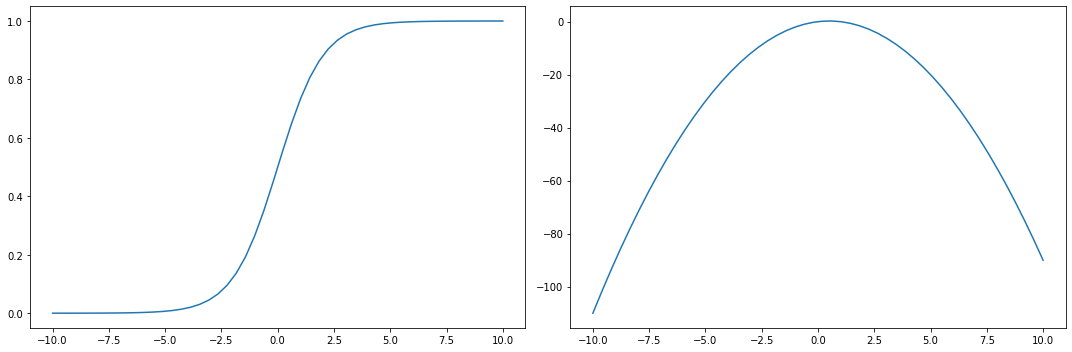

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

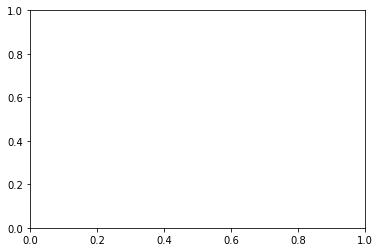

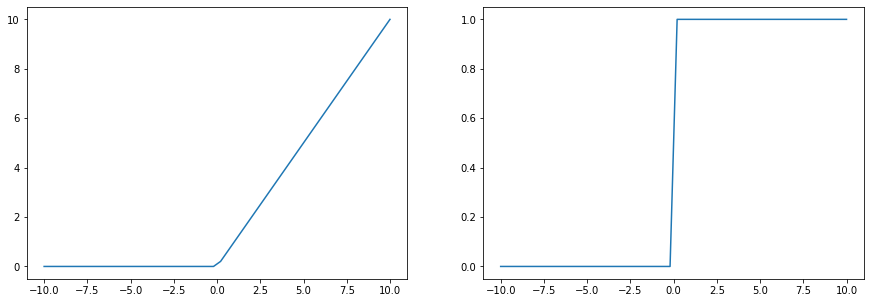

In [ ]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()


In [ ]:
# Prueba de red neuronal con Tensor Flow y su API Keras
import tensorflow as tf
from tensorflow import keras 
# Vamos a cargar 2 librerias numpy + matplotlib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
# Vamos a cargar un set de datos MNIST, este set de datos lleva imagenes de ropa 
# y sus etiquetas para poder identificar el tipo de ropa

fashion_week = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_week.load_data()

In [ ]:
# Vamos a crear dos listas con las etiquetas
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_ESP = ['Camiseta', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo',
                  'Sandalia', 'Camisa', 'Bambas', 'Bolso', 'Botas']

In [ ]:
# Explorar el set de datos 
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
# Cada etiqueta, es un numero entero entre 0 y 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Para ver en que carpet/fichero estan los datos en local
print(fashion_week)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [ ]:
# Para ver los datos de la parte de test
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_images)

10000

La etiqueta asociada tiene un valor de 8
La clasificacion de esta imagen es: Bolso


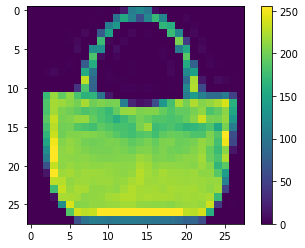

In [ ]:
# Vamos a visualizar una imagen 
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show
# Imprimiremos la etiqueta y su clasificacion
print("La etiqueta asociada tiene un valor de " + str(train_labels[100]))
print("La clasificacion de esta imagen es: " + class_names_ESP[train_labels[100]])

In [ ]:
# Vamos a crear una funcion, para que pasando el numero de imagen me la 
# muestre
def muestra_imagen_train(x):
          plt.figure()
          plt.imshow(train_images[x])
          plt.colorbar()
          plt.grid(False)
          plt.show
          # Imprimir la etiqueta en 2 idiomas
          pieza_ropa = class_names[train_labels[x]]
          pieza_ropa_ESP = class_names_ESP[train_labels[x]]
          print("Esta ropa es en ingles: " + pieza_ropa)
          print("Esta ropa es en Spanish: " + pieza_ropa_ESP)

Esta ropa es en ingles: T-shirt
Esta ropa es en Spanish: Camiseta


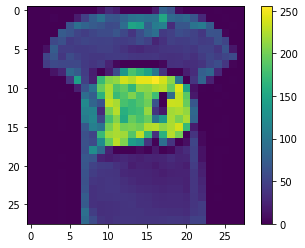

In [ ]:
muestra_imagen_train(1525)

In [ ]:
# Vamos a escalar los valores en un rango entre 0 y 1 antes de alimentarlos al modelo
# de datos, para hacerlo dividiremos entre 255 (Esto hay que hacerlo para las imagenes
# de entreo y las de test
train_images = train_images/255.0
test_images = test_images/255.0

<function matplotlib.pyplot.show(*args, **kw)>

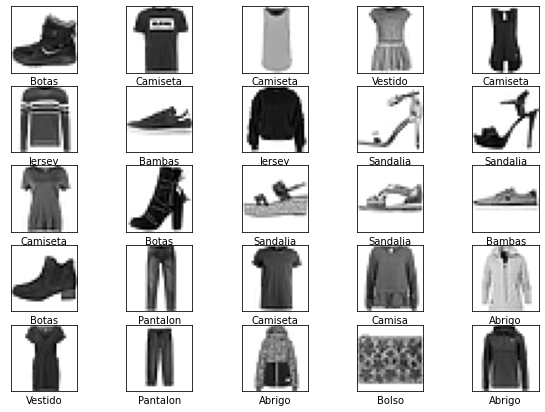

In [ ]:
# Para verificar que el set de datos esta en el formato correcto y
# para construir y entrenar la red neuronal, vamos a ver las primeras 25 imagenes, le
# pondremos el nombre de cada clase debajo de la imagen 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_ESP[train_labels[i]])
plt.show

In [ ]:
# Vamos a crear la red neuromnal, las capas son los layers
# Flatten significa aplanar todas las dimensiones excepto una
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation= 'relu'),
                          keras.layers.Dense(10, activation='softmax')])


In [47]:
# Ya tenemos creadas las capas, ahora tenemos que 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
# Vamos a hacer el entreno con fit, importante definir el numero de epochs, 
#
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3543 - accuracy: 0.8746
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3520 - accuracy: 0.8746
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3499 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3473 - accuracy: 0.8764
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3448 - accuracy: 0.8767
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3426 - accuracy: 0.8775
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3406 - accuracy: 0.8785
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8794
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8800
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3

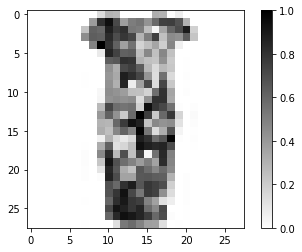

3
Vestido


In [55]:
# Vamos a ver las imagenes del test
plt.figure()
plt.imshow(test_images[100], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
# Vamos a imprimir la etiqueta
print(test_labels[100])
print(class_names_ESP[test_labels[100]])

In [66]:
def muestra_imagen_test(x):
    plt.figure()
    plt.imshow(test_images[x])
    plt.colorbar()
    plt.grid = False
    plt.show
    # Imprimir la etiqueta + tipo de ropa
    pieza_ropa2 = class_names[test_labels[x]]
    pieza_ropa2_ESP = class_names_ESP[test_labels[x]]
    print("El numero de la etiqueta es " + str(test_labels[x]))
    print("El tipo de ropa es " + pieza_ropa2_ESP)


El numero de la etiqueta es 3
El tipo de ropa es Vestido


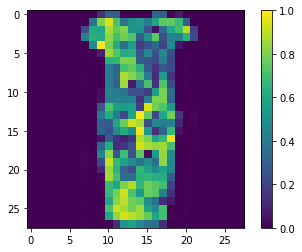

In [71]:
muestra_imagen_test(100)

In [69]:
# Vamos a evaluar la exactitud, comparar el rendimiento del modelo sobre
# el set de datos
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss)
print(test_acc)

313/313 - 1s - loss: 73.7223 - accuracy: 0.7489 - 502ms/epoch - 2ms/step
73.7222900390625
0.7488999962806702


In [72]:
# Vamos a hacer la prediccion sobre el set de datos de test (10000)
prediccion = model.predict(test_images)
# Aqui el modelo va a predecir la etiqueta para cada imagen
prediccion[100]

313/313 [==============================] - 0s 2ms/step


array([0.        , 0.        , 0.        , 0.99999994, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [75]:
# Como ver el valor + alto de prediccion
np.argmax(prediccion[100])
print(class_names_ESP[np.argmax(prediccion[100])])

Vestido


In [76]:
# Como ver el valor + alto de prediccion
np.argmax(prediccion[500])
print(class_names_ESP[np.argmax(prediccion[500])])

Jersey


1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

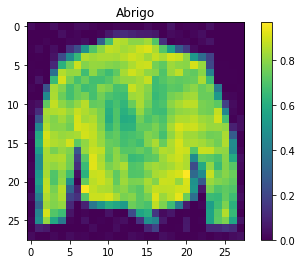

In [94]:
# Probar una imagen que no esta ene le set de datos
# Abriremos la imagen en jpg y le haremos resize a 28 pixeles
from PIL import Image
basewidth = 28
img = Image.open('chupa.jpg')
hsize = basewidth
img = img.resize((basewidth, hsize))
# Vamos a convertirlo a Blanco & Negro
imbw = np.array(Image.open('resized_chupa.jpg').convert('L'))
# La transformamos en un array
data = np.array(imbw)
# Invertir los colores para que se asemeje al dataset
data = 1 - data/255.0
plt.figure()
plt.imshow(data)
plt.colorbar()
plt.grid = False
# Haremos la prediccion con el modelo ya entrenado
prediccion2 = model.predict(data)
plt.title(class_names_ESP[np.argmax(prediccion2)])
plt.show
prediccion2